# Pattern Mining - Домашнее Задание №1
### Выполнила Ирина Дёмина 

[Ссылка на текст задания](https://www.dropbox.com/s/niz1ncvssewokxl/HW_FIM_FCA.pdf?dl=0)

Задание 1а:

<img src = './images/problem-set-1a-text.png'>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_table('./data/a.txt')

In [3]:
data.head()

,12a1970 lexmark,2 stacker,21 black jack,2nd mortgage,acapulco hotel,accept account card credit merchant,accept card credit,accept card credit online,accessory computer,accessory desk,...,woman,work home,xenadrine,xenical,xenical on line,xxx,yohimbe,yukon,zinc,zyban
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Заголовки массива - это конкретные наборы слов объявлений, например:

for col in data.columns[30:50]:
    print(col)

ad banner
ad personal
add url
address internet
address web
adds personal
adipex
adipex buy
adipex buy online
adipex cheap
adipex diet
adipex diet pill
adipex line
adipex online
adipex online order
adipex online prescription
adipex order
adipex p
adipex phentermine
adipex prescription


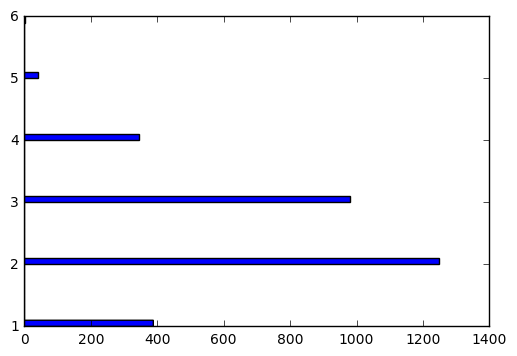

In [5]:
# Отдельные наборы/объявления построены на небольших словосочетаниях
# Не более 6 слов, большинство состоят из 2-3 слов

index = np.array(data.columns)
max_len = 0
index_len = []
for ind in index:
    ind_len = len(ind.split())
    index_len.append(ind_len)
    if ind_len > max_len:
        max_len = ind_len
        
plt.hist(index_len, bins=50, orientation='horizontal')
plt.show()

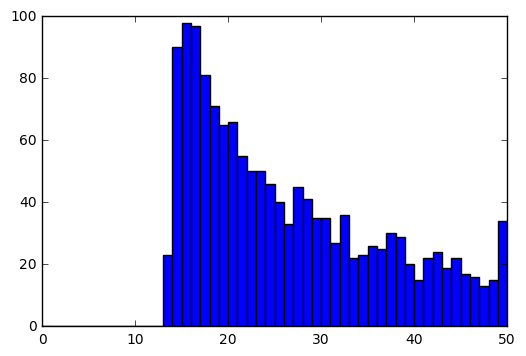

In [6]:
# Общее число словосочетаний каждого рекламодателя (привожу от 0 до 50 для наглядности).

plt.hist(np.sum(data, axis=1), bins=50, range=(0, 50))
plt.show()

In [7]:
# Максимальное число различных наборов слов одного рекламодателя = 947

max(np.sum(data, axis=1))

947

In [8]:
def combine_campaings_per_firm_np(dataframe):
    prct = 0.0
    data = np.array(dataframe)
    max_row = data.shape[0]
    max_range = data.shape[1]
    output = []
    for row in range(max_row):
#         if row%(max_row//10) == 0:
#             print('{0:.2f}% done'.format(prct))
#             prct += 10.0
        row_summary = []
        for col in range(max_range):
            if data[row, col] == 1:
                row_summary.append(col)
        output.append(row_summary)
    return output

In [9]:
%%time

# Конверсия данных в формат SPMF: каждая строка - положительные целые числа,
# упорядоченные по ворастанию

new_data = combine_campaings_per_firm_np(data)

CPU times: user 2.67 s, sys: 27.3 ms, total: 2.7 s
Wall time: 2.7 s


In [10]:
# Записываем для работы в SPMF один раз

# f = open('./data/SPMF-input-1.txt', mode='w')
# for line in new_data:
#     f.write(str(line).strip('[]') + '\n')
# f.close()

In [11]:
# Читаем аутпут из SPMF

f = open('./data/SPMF-ouptut-1a.txt', mode='r')
result_1a = []
result_1a = f.read().splitlines()
f.close()

# Ответ на задание 1-а

In [12]:
len(result_1a)

17409

<img src = './images/SPMF-result-1a.png'>

**Опционально** 

Хотя на Piazza уже обсуждалось, что наборов с числом словосоветаний > 20 c заданной поддержкой нет.  У меня получился такой же результат - максимум 9.  Я хотела так же посмотреть на набор уникальных слов в наборе словосочетаний.

In [13]:
result1a_array = []
for entry in result_1a:
    if ',:' in entry:
        delim = entry.find(',:')
        key = entry[:delim]
        value = entry[delim + 2:]
    else:
        delim = entry.find(':')
        key = entry[:delim]
        value = entry[delim + 1:]
    key_len = len(key.split(', '))
    entry_list = [str(key), key_len, int(value)]
    result1a_array.append(entry_list)

In [14]:
result1a_df = pd.DataFrame(result1a_array, columns=['key', 'key_len', 'sup'])
result1a_df[result1a_df['key_len'] > 8]

,key,key_len,sup
3242,"1016, 998, 1001, 989, 1011, 1888, 995, 1021, 1906",9,36
3413,"1016, 1019, 998, 1001, 989, 1011, 1888, 1906, ...",9,35
3417,"1016, 1019, 998, 1001, 989, 1011, 995, 1021, 1906",9,36
3610,"1016, 1019, 1001, 989, 1011, 1888, 995, 1021, ...",9,37
13955,"998, 989, 1011, 1888, 969, 1882, 995, 1021, 1906",9,36
14137,"998, 1001, 989, 1011, 1888, 969, 995, 1021, 1906",9,35
14744,"1001, 989, 1011, 1888, 969, 1882, 995, 1021, 1906",9,37


In [15]:
result1a_df.describe()

,key_len,sup
count,17409.000000,17409.000000
mean,3.912000,39.645011
std,1.434043,7.213015
min,1.000000,35.000000
25%,3.000000,36.000000
50%,4.000000,37.000000
75%,5.000000,41.000000
max,9.000000,159.000000


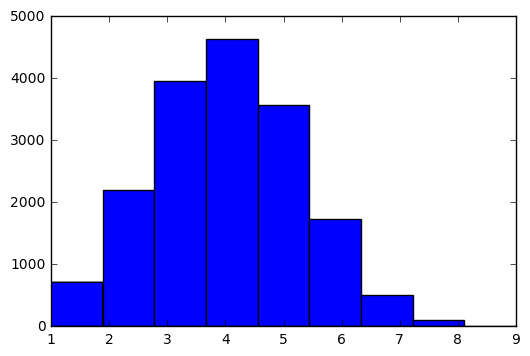

In [18]:
# Большинство частых наборов (с заданной минимальной поддержкой)
# содержат 3-5 словосочетаний

plt.hist(result1a_df['key_len'], bins=9)
plt.show()

In [19]:
# Чтобы посмотреть на наборы не как индексы, а наборы уникальных слов,
# делаем обратный мэппинг: из номера в набор слов

reverse_index = {}
for key, val in enumerate(index):
    reverse_index[key] = val

In [20]:
%%time

word_based_output = []
for entry in result1a_array:
    new_entry = []
    new_key = []
    key = entry[0]
    key = key.split(', ') 
    sup = entry[2]
    word_list = set()
    for k in key:
        if ' ' in k:
            tmp_key = k.split()
            for tmp_k in tmp_key:
                word_list.update(reverse_index[int(tmp_k)].split())
                new_key.append(tmp_k)
        else:
            new_key.append(k)
            word_list.update(reverse_index[int(k)].split())
    key_len = len(new_key)
    word_count = len(word_list)
    new_entry = [new_key, key_len, word_list, word_count, sup]
    word_based_output.append(new_entry)

CPU times: user 230 ms, sys: 10.6 ms, total: 241 ms
Wall time: 240 ms


In [21]:
# Теперь можно смотреть на частые множества наборов (индексы) и 
# соответствующие им наборы уникальных слов

word_based_df = pd.DataFrame(word_based_output, columns=['new_key', 'key_len', 'words', 'word_count', 'sup'])
word_based_df.head()

,new_key,key_len,words,word_count,sup
0,[932],1,"{hp, cartridge, printer}",3,35
1,[894],1,"{carrier, long, distance}",3,35
2,[816],1,"{cartridge, canon, printer}",3,35
3,[801],1,"{digital, camera}",2,35
4,[744],1,"{diet, pill, buy}",3,35


In [22]:
word_based_df.describe()

,key_len,word_count,sup
count,17409.000000,17409.000000,17409.000000
mean,3.932966,5.219312,39.645011
std,1.428536,1.395952,7.213015
min,1.000000,1.000000,35.000000
25%,3.000000,4.000000,36.000000
50%,4.000000,5.000000,37.000000
75%,5.000000,6.000000,41.000000
max,9.000000,10.000000,159.000000


In [23]:
# Так оказалось, что самый большой набор уникальных слов у рекламодателей из 
# сегмента вэб хостингов

word_based_df[word_based_df['word_count'] > 9]

,new_key,key_len,words,word_count,sup
4722,"[1471, 1074, 1170, 1075, 1233, 120, 2156]",7,"{cheap, affordable, web, discount, cost, servi...",10,37
4723,"[1471, 1074, 1170, 1075, 1233, 120, 2156, 2159]",8,"{cheap, affordable, web, discount, cost, servi...",10,36
4731,"[1471, 1074, 1170, 1233, 120, 2156]",6,"{cheap, affordable, web, discount, cost, servi...",10,38
4732,"[1471, 1074, 1170, 1233, 120, 2156, 2159]",7,"{cheap, affordable, web, discount, cost, servi...",10,37
4806,"[1471, 1170, 1075, 1233, 120, 2156, 2159]",7,"{cheap, affordable, web, cost, discount, servi...",10,37
5999,"[2127, 1170, 1075, 1233, 120, 2159, 2156]",7,"{cheap, affordable, web, cost, site, services,...",10,35
9513,"[2131, 1170, 1075, 1233, 120, 2156, 2159]",7,"{cheap, affordable, web, cost, services, site,...",10,35
9816,"[1074, 1170, 2136, 1233, 120, 2156]",6,"{cheap, affordable, web, cost, site, services,...",10,35
11252,"[2144, 2154, 1170, 1233, 120, 2156, 2159]",7,"{affordable, web, cost, service, services, pro...",10,35
11356,"[2144, 1170, 1075, 1233, 120, 2156, 2159]",7,"{cheap, affordable, web, cost, services, site,...",10,35
